## Assignment 2B
In this exercise, we aim to practice the implementation of Euler’s method for solving vector-valued differential equations. To do so, we start with a linear differential equation, where the analytical solution is known. This allows us to compare the numerical results obtained using Euler’s method with the exact solution and better understand the behavior and accuracy of the method in a vectorial context. Consider the matrix:
$$A=\begin{bmatrix}0&2\\-2&0\end{bmatrix}$$
The differential equation to solve is:
$$\dot{x}(t)=Ax(t)$$
where $x(t)$ is a vector function:
$$x(t)=\begin{bmatrix}x_1(t)\\x_2(t)\end{bmatrix}$$
The solution to this equation can be written in terms of the matrix exponential:
$$x(t)=e^{At}x(0)$$
where $e^{At}$ can be computed either directly using eigenvalues and eigenvectors:
$$x(t)=Pe^{\Lambda t}P^{-1}x(0)$$
or through the power-series expansion:
$$e^{At}=\sum_{n=0}^\infty\dfrac{(At)^n}{n!}$$
In this case, it can be readily shown analytically that the matrix exponential has the following explicit form, corresponding to a clockwise rotation by 2t radians:
$$e^{At}=\begin{bmatrix}\cos(2t)&\sin(2t)\\-\sin(2t)&\cos(2t)\end{bmatrix}$$

### Problem (100 Points)

#### Problem A
Write a program that uses Euler’s method (1st order R-K method) to solve the differential equation $\dot{x}(t) = Ax(t)$. Start with the initial condition:
$$x(0)=\begin{bmatrix}1\\0\end{bmatrix}$$
and calculate $x(t)$ from $t = 0$ to $t = 10$ using a reasonable number of steps. Plot the numerical results for both components $x_1(t)$ and $x_2(t)$ as functions of time.

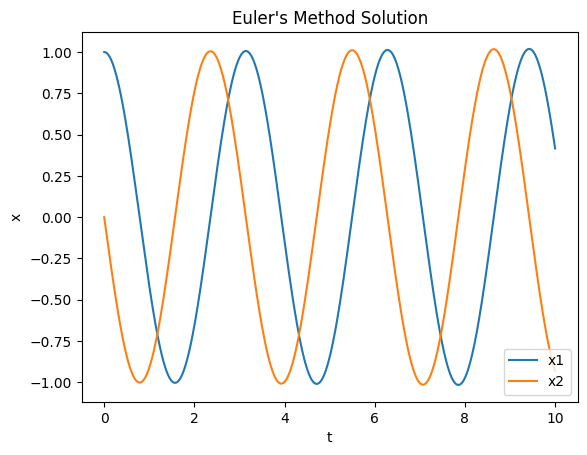

In [35]:
import numpy as np

def eulers_method(
    df: callable,
    t0: float | int,
    x0: float | int | np.ndarray | tuple,
    dt: float | int,
    tf: float | int
):
    assert callable(df)
    assert isinstance(t0, (int, float))
    assert isinstance(x0, (int, float, np.ndarray, tuple))
    assert isinstance(dt, (int, float))
    assert isinstance(tf, (int, float))
    t = np.arange(t0, tf+dt, dt)
    x = [x0]
    for i in range(len(t)-1):
        x.append(x[-1] + df(t[i], x[-1])*dt)
    return t, x

# Problem Parameters
A = np.array([[0, 2], [-2, 0]])
x0 = np.array([[1], [0]])
f = lambda t, x: A@x
t_vec, x_vec = eulers_method(f, t0=0, x0=x0, dt=1e-3, tf=10)

# Plotting
import matplotlib.pyplot as plt
x_vec = np.array(x_vec).reshape(-1, 2)
plt.plot(t_vec, x_vec[:, 0], label='x1')
plt.plot(t_vec, x_vec[:, 1], label='x2')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Euler\'s Method Solution')
plt.legend()
plt.show()



#### Problem B
Compare your numerical results with the analytical solution provided above. Plot the analytical solution $x(t) = e^{At}x(0)$ alongside the numerical results for both $x_1(t)$ and $x_2(t)$. Comment on the accuracy of your numerical solution as a function of the step size $h$.

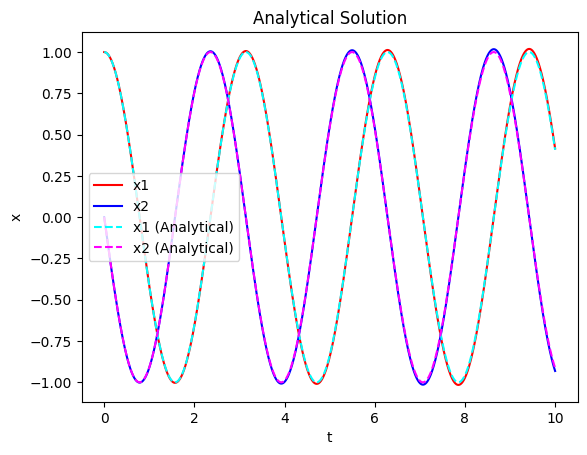

In [36]:
# Problem Parameters
expA = lambda t: np.array([[np.cos(2*t), np.sin(2*t)], [-np.sin(2*t), np.cos(2*t)]])

# Plot the solution
t_vec_analytic = np.linspace(0, 10, 1000)
x_vec_analytic = np.array([expA(t)@x0 for t in t_vec_analytic]).reshape(-1, 2)
plt.plot(t_vec, x_vec[:, 0], label='x1', color='red')
plt.plot(t_vec, x_vec[:, 1], label='x2', color='blue')
plt.plot(t_vec_analytic, x_vec_analytic[:, 0], label='x1 (Analytical)', linestyle='--', color='cyan')
plt.plot(t_vec_analytic, x_vec_analytic[:, 1], label='x2 (Analytical)', linestyle='--', color='magenta')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Analytical Solution')
plt.legend()
plt.show()

The accuracy of the numerical model depends on the steps $dt$ chosen, since when I dropped it from $0.1$ to $0.01$ it would slowly increase in amplitude while keeping the same sinusoidal shape.

For a $dt<10^{-3}$, it seems to converge pretty well and pretty much exactly models the analytic solutions given.